# Testing the Full, Last Layer and Subnetwork functionality

### Model training

In [1]:
import Pkg
Pkg.activate("../../../")

  Activating project at `c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl`


In [2]:
using Flux
using Flux: gradient
using LaplaceRedux
using LinearAlgebra
using Plots
using Statistics
using Zygote
using DelimitedFiles

In [3]:
xs, ys = LaplaceRedux.Data.toy_data_non_linear(200)
X = hcat(xs...) # bring into tabular format
data = zip(xs,ys)

zip([[2.331129340734004, 1.2671387719634948], [3.984717559292358, 4.7965204417945815], [3.8480424366267814, 4.144631839851801], [1.3580041772817069, 0.6120079446837656], [1.8161112904852732, 4.454405505746549], [3.515644111107333, 3.1419760764442866], [1.0593626836867291, 1.4150136765516164], [4.422996885035591, 2.9415562221660863], [3.2567705942249794, 3.34450222058587], [3.4073462801372347, 4.5901399430851795]  …  [-3.309455281664986, 4.054536831001601], [-1.741897545025684, 1.1903125389700167], [-4.572030168633271, 2.858943773099848], [-0.5569206052635147, 0.5485536219511438], [-4.618336964894784, 1.9398301053714349], [-3.339643498176893, 4.729561419241085], [-4.316935337930718, 3.634316808806839], [-3.2174121564068088, 0.9323719774552064], [-2.289914357925406, 1.6937981063923988], [-4.19488964980321, 3.4301378146099597]], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [4]:
n_hidden = 10
D = size(X,1)
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, 1)
)
println(D)
print(Flux.params(nn))
loss(x, y) = Flux.Losses.logitbinarycrossentropy(nn(x), y) 

2


Params([

Float32[0.36158833 -0.15143497; 0.30008522 0.24838588; 0.35427645 0.047051307; 0.04085741 -0.2609254; 0.010989875 0.08899568; -0.5544695 0.56961447; -0.6219764 0.14409705; -0.31587982 -0.23924406; 0.17113905 0.50571334; -0.19424647 -0.6864753], 

Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.4589919 -0.21216203 0.33497265 -0.035374265 -0.37370184 -0.37712577 0.7210361 0.2660862 -0.13072398 0.35557163], Float32[0.0]])

loss (generic function with 1 method)

In [5]:
using Flux.Optimise: update!, Adam
opt = Adam(1e-3)
epochs = 100
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
  for d in data
    gs = gradient(Flux.params(nn)) do
      l = loss(d...)
    end
    update!(opt, Flux.params(nn), gs)
  end
  if epoch % show_every == 0
    println("Epoch " * string(epoch))
    @show avg_loss(data)
  end
end

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 10, σ)
│   summary(x) = 2-element Vector{Float64}
└ @ Flux C:\Users\adeli\.julia\packages\Flux\EHgZm\src\layers\stateless.jl:60


Epoch 10


avg_loss(data) = 0.660456460788846


Epoch 20
avg_loss(data) = 0.5741685393825173


Epoch 30
avg_loss(data) = 0.44194799911230803


Epoch 40
avg_loss(data) = 0.3071578092873096


Epoch 50
avg_loss(data) = 0.21276778519153594


Epoch 60
avg_loss(data) = 0.15376862488687038


Epoch 70
avg_loss(data) = 0.116822305098176


Epoch 80
avg_loss(data) = 0.09270221631973982


Epoch 90
avg_loss(data) = 0.07612916729878634


Epoch 100
avg_loss(data) = 0.06418202942702919


### LA for Full Neural Network

┌ Info: Iteration 50: P₀=0.07119342711119822, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


loss(exp.(logP₀), exp.(logσ)) = 35.00998579879795
Log likelihood: -12.836405885405838
Log det ratio: 31.68041184274918
Scatter: 12.666747984035037
loss(exp.(logP₀), exp.(logσ)) = 34.91097844801921
Log likelihood: -12.836405885405838
Log det ratio: 33.57103898045159
Scatter: 10.57810614477515
loss(exp.(logP₀), exp.(logσ)) = 34.910921402569066
Log likelihood: -12.836405885405838
Log det ratio: 33.53401598828957
Scatter: 10.615015046036884

┌ Info: Iteration 100: P₀=0.0594542205893535, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 150: P₀=0.05966166698167485, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348



loss(exp.(logP₀), exp.(logσ)) = 34.910918654054484
Log likelihood: -12.836405885405838
Log det ratio: 33.52323179201545
Scatter: 10.62579374528183
loss(exp.(logP₀), exp.(logσ)) = 34.91091864218925
Log likelihood: -12.836405885405838
Log det ratio: 33.52391375028533
Scatter: 10.625111763281494
loss(exp.(logP₀), exp.(logσ)) = 34.91091864218018
Log likelihood: -12.836405885405838
Log det ratio: 33.52389565573425
Scatter: 10.625129857814432
loss(exp.(logP₀), exp.(logσ)) = 34.91091864218019
Log likelihood: -12.836405885405838


┌ Info: Iteration 200: P₀=0.05972224863530969, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 250: P₀=0.05971841555708839, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 300: P₀=0.05971851725736802, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 350: P₀=0.05971851889103213, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


Log det ratio: 33.52389536507245
Scatter: 10.62513014847626
loss(exp.(logP₀), exp.(logσ)) = 34.9109186421802
Log likelihood: -12.836405885405838
Log det ratio: 33.5238954256217
Scatter: 10.62513008792702
loss(exp.(logP₀), exp.(logσ)) = 34.91091864218018
Log likelihood: -12.836405885405838
Log det ratio: 33.52389542333617
Scatter: 10.6251300902125


┌ Info: Iteration 400: P₀=0.059718518550715284, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 450: P₀=0.059718518563560787, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


loss(exp.(logP₀), exp.(logσ)) = 34.91091864218015
Log likelihood: -12.836405885405838
Log det ratio: 33.52389542302329
Scatter: 10.62513009052534
...

┌ Info: Iteration 500: P₀=0.05971851856531914, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


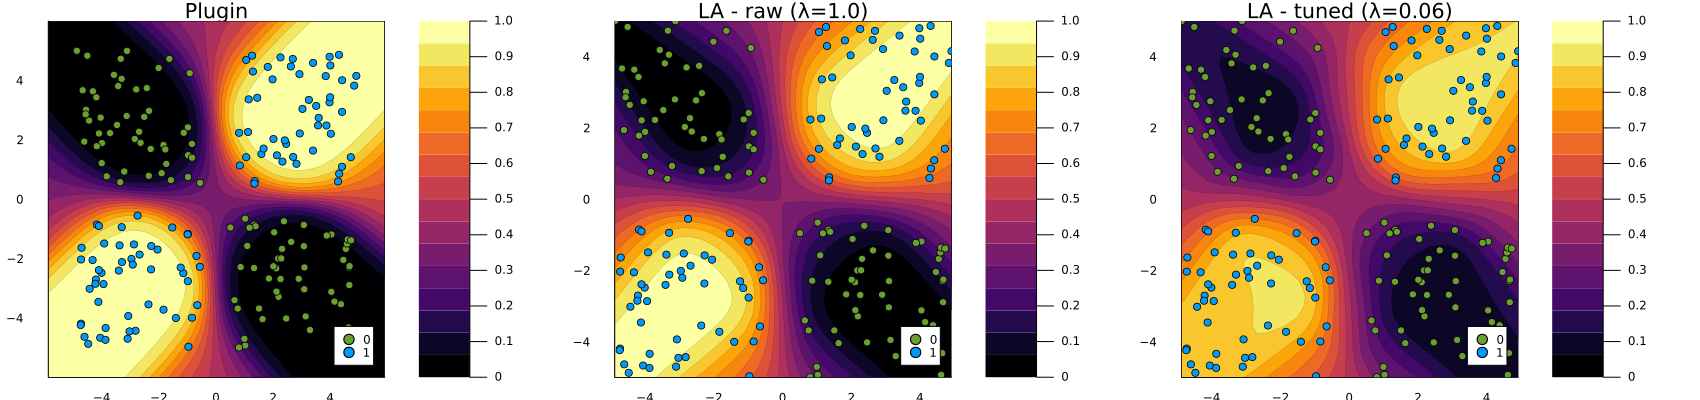

In [6]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:all)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

### LA for Last Layer of Neural Network

loss(exp.(logP₀), exp.(logσ)) = 20.790530143289875
Log likelihood: -12.836405885405838
Log det ratio: 11.287688524425974
Scatter: 4.620559991342099
loss(exp.(logP₀), exp.(logσ)) = 20.777041275068335
Log likelihood: -12.836405885405838
Log det ratio: 11.784405292007644
Scatter: 4.096865487317351
loss(exp.(logP₀), exp.(logσ)) = 20.776786510240132
Log likelihood: -12.836405885405838
Log det ratio: 11.724299350874052
Scatter: 4.156461898794536
loss(exp.(logP₀), exp.(logσ)) = 20.776786462471303
Log likelihood: -12.836405885405838
Log det ratio: 11.723130099407832
Scatter: 4.157631054723098
loss(exp.(logP₀), exp.(logσ)) = 20.776786456779874
Log likelihood: -12.836405885405838
Log det ratio: 11.72344409758687
Scatter: 4.157317045161204
loss(exp.(logP₀), exp.(logσ)) = 20.776786456734946
Log likelihood: -12.836405885405838
Log det ratio: 11.723416604496776
Scatter: 4.1573445381614365


┌ Info: Iteration 50: P₀=0.07388520494661839, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 100: P₀=0.06551105206649374, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 150: P₀=0.06646403029517718, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 200: P₀=0.06648272571858002, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 250: P₀=0.06647770453913873, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 300: P₀=0.0664781441667944, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\

loss(exp.(logP₀), exp.(logσ)) = 20.7767864567347
Log likelihood: -12.836405885405838
Log det ratio: 11.72341863547031
Scatter: 4.157342507187415
loss(exp.(logP₀), exp.(logσ)) = 20.776786456734698
Log likelihood: -12.836405885405838
Log det ratio: 11.723418496028803
Scatter: 4.15734264662892
loss(exp.(logP₀), exp.(logσ)) = 20.7767864567347
Log likelihood: -12.836405885405838
Log det ratio: 11.723418503824014
Scatter: 4.15734263883371
loss(exp.(logP₀), exp.(logσ)) = 20.77678645673469
Log likelihood: -12.836405885405838
Log det ratio: 11.723418503658781
Scatter: 4.157342638998927
...


┌ Info: Iteration 350: P₀=0.06647811169044257, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 400: P₀=0.06647811392018621, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 450: P₀=0.06647811379553666, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 500: P₀=0.06647811379817857, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


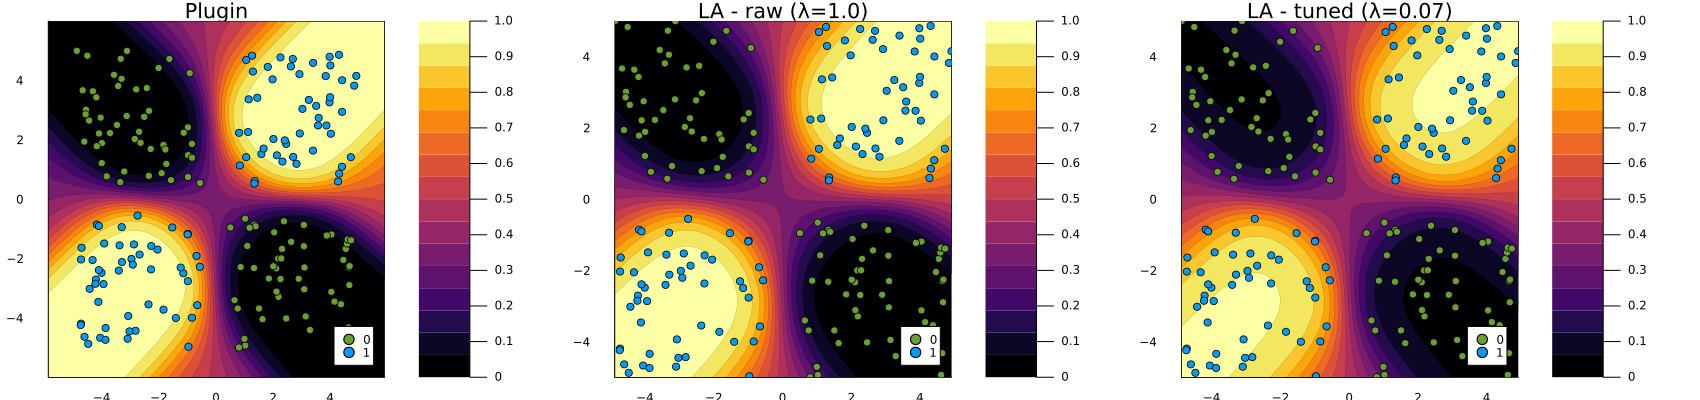

In [7]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:last_layer)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

### LA for Subset of Neural Network

Looking at the plot for tuned Laplace, by selecting just 4 of the 41 weights in the neural network provided in this notebook, we can see that there is not much information from the gradients and the jacobian that Laplace Approximation can use in order to adjust its predictive uncertainty.

loss(exp.(logP₀), exp.(logσ)) = 15.803953125327006
Log likelihood: -12.836405885405838
Log det ratio: 4.06795857609848
Scatter: 1.867135903743856
loss(exp.(logP₀), exp.(logσ)) = 15.799303133384758
Log likelihood: -12.836405885405838
Log det ratio: 3.901188332097764
Scatter: 2.0246061638600765
loss(exp.(logP₀), exp.(logσ)) = 15.799288674641264
Log likelihood: -12.836405885405838
Log det ratio: 3.8909217538188745
Scatter: 2.034843824651977
loss(exp.(logP₀), exp.(logσ)) = 15.799288610242385
Log likelihood: -12.836405885405838
Log det ratio: 3.891521050761301
Scatter: 2.0342443989117904
loss(exp.(logP₀), exp.(logσ)) = 15.799288609986439
Log likelihood: -12.836405885405838
Log det ratio: 3.8915752405804795
Scatter: 2.0341902085807204
loss(exp.(logP₀), exp.(logσ)) = 15.79928860996363
Log likelihood: -12.836405885405838
Log det ratio: 3.8915624014191668
Scatter: 2.0342030476964164
loss(exp.(logP₀), exp.(logσ)) = 15.799288609963536
Log likelihood: -12.836405885405838
Log det ratio: 3.891563130

┌ Info: Iteration 50: P₀=0.0858547007198089, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 100: P₀=0.09309550307781617, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 150: P₀=0.09356625151214124, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 200: P₀=0.09353868869926606, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 250: P₀=0.09353619691779123, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 300: P₀=0.09353678728640519, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\

loss(exp.(logP₀), exp.(logσ)) = 15.799288609963536
Log likelihood: -12.836405885405838
Log det ratio: 3.891563173994503
Scatter: 2.0342022751208946
loss(exp.(logP₀), exp.(logσ)) = 15.799288609963538
Log likelihood: -12.836405885405838
Log det ratio: 3.891563170394294
Scatter: 2.0342022787211045
loss(exp.(logP₀), exp.(logσ)) = 15.799288609963538
Log likelihood: -12.836405885405838
Log det ratio: 3.8915631700519953
Scatter: 2.034202279063403
...


┌ Info: Iteration 400: P₀=0.09353675176181372, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 450: P₀=0.09353675192735868, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 500: P₀=0.09353675194309825, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


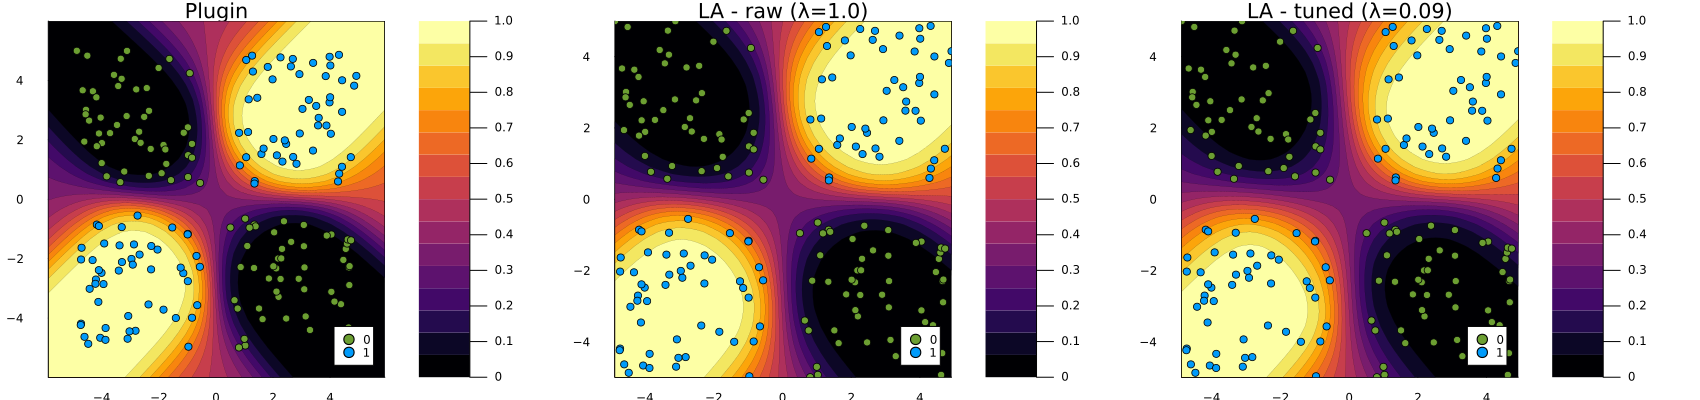

In [8]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:subnetwork, subnetwork_indices=[[3, 1, 1], [2, 8], [2, 9], [2, 10]])
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

When providing all 41 weights, the uncertainties are visibly higher.

loss(exp.(logP₀), exp.(logσ)) = 35.009985798797956
Log likelihood: -12.836405885405838
Log det ratio: 31.680411842749194
Scatter: 12.666747984035037


┌ Info: Iteration 50: P₀=0.07119342711119822, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


loss(exp.(logP₀), exp.(logσ)) = 34.91097844801921
Log likelihood: -12.836405885405838
Log det ratio: 33.57103898045159
Scatter: 10.57810614477515
loss(exp.(logP₀), exp.(logσ)) = 34.91092140256906
Log likelihood: -12.836405885405838
Log det ratio: 33.53401598828955
Scatter: 10.615015046036884
loss(exp.(logP₀), exp.(logσ)) = 34.91091865405447
Log likelihood: -12.836405885405838
Log det ratio: 33.52323179201544
Scatter: 10.62579374528183

┌ Info: Iteration 100: P₀=0.0594542205893535, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 150: P₀=0.05966166698167485, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 200: P₀=0.05972224863530969, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348



loss(exp.(logP₀), exp.(logσ)) = 34.910918642189266
Log likelihood: -12.836405885405838
Log det ratio: 33.52391375028536
Scatter: 10.625111763281499
loss(exp.(logP₀), exp.(logσ)) = 34.91091864218017
Log likelihood: -12.836405885405838
Log det ratio: 33.523895655734236
Scatter: 10.625129857814432
loss(exp.(logP₀), exp.(logσ)) = 34.910918642180185
Log likelihood: -12.836405885405838
Log det ratio: 33.523895365072434
Scatter: 10.62513014847626


┌ Info: Iteration 250: P₀=0.05971841555708842, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 300: P₀=0.05971851725736802, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 350: P₀=0.05971851889103213, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


loss(exp.(logP₀), exp.(logσ)) = 34.9109186421802
Log likelihood: -12.836405885405838
Log det ratio: 33.5238954256217
Scatter: 10.62513008792702
loss(exp.(logP₀), exp.(logσ)) = 34.91091864218018
Log likelihood: -12.836405885405838
Log det ratio: 33.52389542333617
Scatter: 10.6251300902125
loss(exp.(logP₀), exp.(logσ)) = 34.91091864218015
Log likelihood: -12.836405885405838
Log det ratio: 33.523895423023276
Scatter: 10.62513009052534
...


┌ Info: Iteration 400: P₀=0.059718518550715284, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 450: P₀=0.059718518563560787, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348
┌ Info: Iteration 500: P₀=0.05971851856531914, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:348


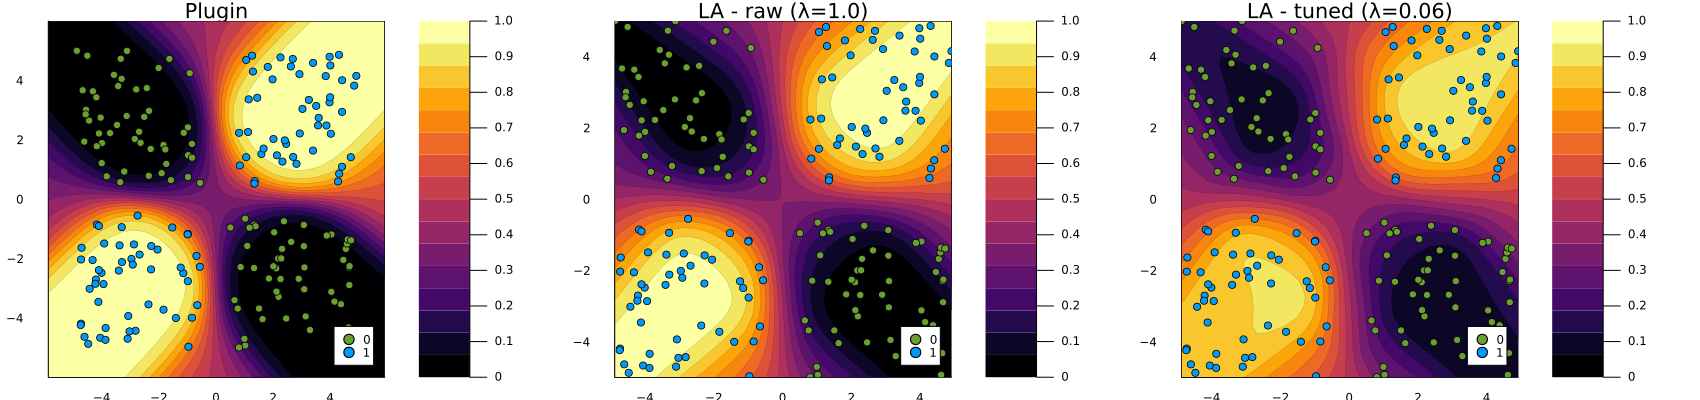

In [9]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:subnetwork, subnetwork_indices=[[1, 2, 1], [1, 1, 1], [1, 1, 2], [1, 2, 2], [1, 3, 1], [1, 3, 2], [1, 4, 1], [1, 4, 2], [1, 5, 1], [1, 5, 2], [1, 6, 1], [1, 6, 2], [1, 7, 1], [1, 7, 2], [1, 8, 1], [1, 8, 2], [1, 9, 1], [1, 9, 2], [1, 10, 1], [1, 10, 2], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [3, 1, 1], [3, 1, 2], [3, 1, 3], [3, 1, 4], [3, 1, 5], [3, 1, 6], [3, 1, 7], [3, 1, 8], [3, 1, 9], [3, 1, 10], [4, 1]])
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))